In [1]:
import pandas as pd

In [2]:
df = pd.read_excel (r'C:\Users\s4320\OneDrive\Desktop\alldata.xlsx')

In [3]:
print (df)

            Image Name     size   Energy  Contrast  Homogeneity  Correlation  \
0         00000000.JPG   8839.0  0.11872  0.120820      0.94235      0.98761   
1     00000000_(2).JPG  10189.0  0.12359  0.326530      0.91042      0.96267   
2     00000000_(3).JPG   8406.0  0.11269  0.415170      0.88805      0.93404   
3     00000000_(4).JPG   6397.0  0.13714  0.242500      0.88940      0.96415   
4     00000000_(5).JPG   5612.0  0.13951  0.361960      0.92156      0.94602   
...                ...      ...      ...       ...          ...          ...   
5154     36-stego2.jpg      NaN  0.73955  0.004286      0.99786      0.99181   
5155     37-stego2.jpg      NaN  0.37489  0.018468      0.99077      0.98346   
5156     38-stego2.jpg      NaN  0.40228  0.023125      0.98844      0.98155   
5157     39-stego2.jpg      NaN  0.72482  0.008184      0.99591      0.97475   
5158     40-stego2.jpg      NaN  0.73972  0.003600      0.99820      0.99311   

     format catogary  
0       JPG    c

In [4]:
df.info

<bound method DataFrame.info of             Image Name     size   Energy  Contrast  Homogeneity  Correlation  \
0         00000000.JPG   8839.0  0.11872  0.120820      0.94235      0.98761   
1     00000000_(2).JPG  10189.0  0.12359  0.326530      0.91042      0.96267   
2     00000000_(3).JPG   8406.0  0.11269  0.415170      0.88805      0.93404   
3     00000000_(4).JPG   6397.0  0.13714  0.242500      0.88940      0.96415   
4     00000000_(5).JPG   5612.0  0.13951  0.361960      0.92156      0.94602   
...                ...      ...      ...       ...          ...          ...   
5154     36-stego2.jpg      NaN  0.73955  0.004286      0.99786      0.99181   
5155     37-stego2.jpg      NaN  0.37489  0.018468      0.99077      0.98346   
5156     38-stego2.jpg      NaN  0.40228  0.023125      0.98844      0.98155   
5157     39-stego2.jpg      NaN  0.72482  0.008184      0.99591      0.97475   
5158     40-stego2.jpg      NaN  0.73972  0.003600      0.99820      0.99311   

     fo

In [5]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
images = df
images.head()

,Image Name,size,Energy,Contrast,Homogeneity,Correlation,format,catogary
0,00000000.JPG,8839.0,0.11872,0.12082,0.94235,0.98761,JPG,clean
1,00000000_(2).JPG,10189.0,0.12359,0.32653,0.91042,0.96267,JPG,clean
2,00000000_(3).JPG,8406.0,0.11269,0.41517,0.88805,0.93404,JPG,clean
3,00000000_(4).JPG,6397.0,0.13714,0.24250,0.88940,0.96415,JPG,clean
4,00000000_(5).JPG,5612.0,0.13951,0.36196,0.92156,0.94602,JPG,clean


In [6]:
print(images.shape)


(5159, 8)


In [7]:
print(images['catogary'].unique())


['clean' 'stego']


In [8]:
print(images['format'].unique())


['JPG' 'BMP' 'TIFF']


In [10]:
print(images.groupby('catogary').size())


catogary
clean    1099
stego    4060
dtype: int64


In [27]:

data_list=images.groupby(['catogary','format']).size()
print(data_list)


catogary  format
clean     BMP        378
          JPG        721
stego     JPG        344
          TIFF      3628
dtype: int64


C:\Users\s4320\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


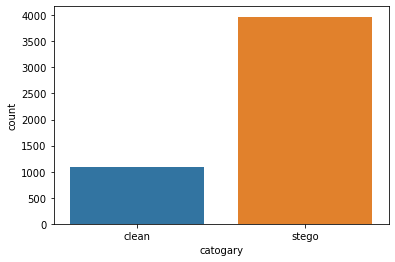

In [33]:
import seaborn as sns
sns.countplot(images['catogary'],label="Count")
plt.show()

In [12]:
import pylab as pl
from pandas.plotting import scatter_matrix
from matplotlib import cm


In [13]:
images.isna().sum
images.dropna(inplace= True)

In [14]:
images.dropna(inplace= True)

In [15]:
images.shape

(5071, 8)

In [16]:
import numpy as np

from sklearn.model_selection import train_test_split
images_names = ['Energy', 'Contrast', 'Homogeneity','Correlation']
X = images[images_names]
y = images['catogary']
#X = X.values.astype(np.float128)
from numpy import inf
images[images_names == inf] = np.finfo(np.float64).max

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [17]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)*100))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)*100))

Accuracy of K-NN classifier on training set: 87.59
Accuracy of K-NN classifier on test set: 82.26


In [18]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier().fit(X_train, y_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)*100))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)*100))

Accuracy of Decision Tree classifier on training set: 100.00
Accuracy of Decision Tree classifier on test set: 80.13


In [19]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
print('Accuracy of LDA classifier on training set: {:.2f}'
     .format(lda.score(X_train, y_train)*100))
print('Accuracy of LDA classifier on test set: {:.2f}'
     .format(lda.score(X_test, y_test)*100))

Accuracy of LDA classifier on training set: 82.93
Accuracy of LDA classifier on test set: 83.68


In [20]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(X_train, y_train)*100))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svm.score(X_test, y_test)*100))

Accuracy of SVM classifier on training set: 82.30
Accuracy of SVM classifier on test set: 82.65
